In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
project_directory = os.getcwd()
print("repertoire du projet:" ,project_directory)

repertoire du projet: C:\Users\DELL


In [17]:
#collecter les noms des datasets

files = [file for file in os.listdir(r'F:\mes video youtube\data-sales-main')]
for file in files:
    print(file)
    

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [21]:
#regroupons les dans une seule dataframe
path = r'F:\mes video youtube\data-sales-main'
#creons une base de donne vide
all_data = pd.DataFrame()

#ajoutons tous les fichiers dans notre all_data

for file in files:
    current_data = pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data ,current_data])
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [9]:
#voyons un exmple de concatenation il faut leur expliquer le concept de concatenation
a='david' + 'tankeu'
print(a)

davidtankeu


In [25]:
#si je veux juste les donne du mois de janvier

donnee_janvier = pd.read_csv(path+'/Sales_January_2019.csv')
donnee_janvier

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [27]:
#metttons toutes les donnes dans un seul fichier

all_data.to_csv(path+'/all_data.csv', index=False)

In [29]:
#explorons maintenant cette base de donne : Voyons les types
all_data.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [33]:
#voyons les valeurs manquantes

all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [37]:
#supprimons les valeurs manquantes

all_data=all_data.dropna(how='all')
all_data.shape

(186305, 6)

Bonjour les ami et bienvenue dans cette nouvelle video analyse des ventes

La on va repondre a la 1ere question c'est de savoir quel est le mois ou on'a realise plus de vente donc ca c'est la qesution qu'on va traiter
avant de se lancer dans le code on va essayer d'abord de mener une petite reflexion de comment eskon doit repondre
L'idee cest qu'il faut extraire les mois a partir de notre base de donne et une fois kon'a extraire les mois l'ideee est de voir 
les chiffres d'affaires genere chaque mois et biensur donc calculer ce chiffre d'affaire voila donc en gros les chauses qu'on va donc
essayer de coder dans cet video et a la fin on va faire un peu de visualisation pour avoir une bonne reponse a notre question 


In [41]:
#chechons a extraire le mois 
def month(x):
    return x.split('/')[0]
#je vous montre comment ca se passe
month('12/30/19  00:01')

'12'

In [43]:
#je vais creer une colone que je vais appeler month et mettre les mois a l'interieur

all_data['Month']=all_data['Order Date'].apply(month)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [47]:
#voyons les mois qu'on'a

all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [49]:
#on'a une seule mauvaise donne il faut la supprimer

all_data = all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [51]:
#changeons le type de Month a int

all_data['Month'] = all_data['Month'].astype(int)
all_data.dtypes

C:\Users\DELL\AppData\Local\Temp\ipykernel_2684\3644794292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype(int)


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [59]:
#changeons egalement la quantite du prix et de la quantite

all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data.dtypes

C:\Users\DELL\AppData\Local\Temp\ipykernel_2684\1061898426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype(float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2684\1061898426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)


Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [61]:
#creons une nouvelle colone appele Sale ou chiffres d'affaires

all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data

C:\Users\DELL\AppData\Local\Temp\ipykernel_2684\3244420136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [65]:
#il nous reste une operation de groupby donc on doit prendre les mois et faire la somme pour trouver le mois avec 
#le meilleur chiffre d'affaire

all_data.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

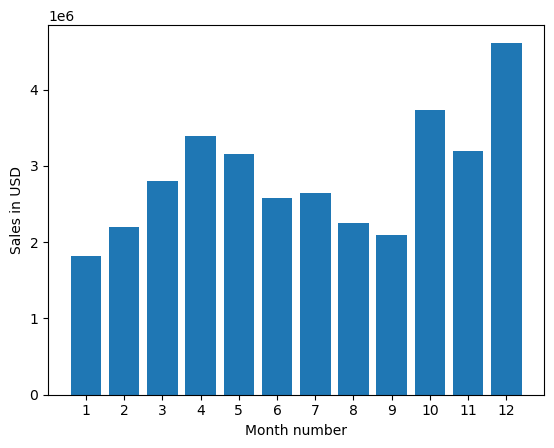

In [67]:
#utilisaons la visualisation pour mieux voir

months = range(1, 13)
plt.bar(months,all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

la reponse a notre question es claire le mois avec le plus grand chiffre d'affaire est le mois 12

#regardons maintenant la ville qui realise le plus grand chiffre d'affaire il faut donc extraire l'information ville apartir de 
#chaque ligne apres avoir extraire la ville on va calculer le chiffre d'affaire et voir la ville qui realise le meilleur chiffre d'affaire


Dans quelle villes nous avons enregistre un maximum de commandes?

In [73]:
'682 Chestnut St, Boston, MA 02215'.split(',')

['682 Chestnut St', ' Boston', ' MA 02215']

In [75]:
'682 Chestnut St, Boston, MA 02215'.split(',')[1]

' Boston'

In [77]:
def city(x):
    return x.split(',')[1]

In [79]:
all_data['city']=all_data['Purchase Address'].apply(city)
all_data

C:\Users\DELL\AppData\Local\Temp\ipykernel_2684\2992180682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['city']=all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [83]:
#comptons le nombre de commande de chaque villes
all_data.groupby('city')['city'].count()

city
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: city, dtype: int64

In [85]:
all_data.groupby('city')['city'].count().index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='city')

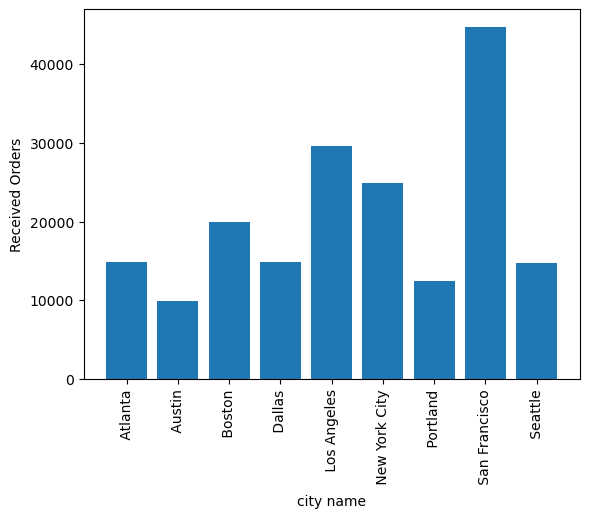

In [87]:
plt.bar(all_data.groupby('city')['city'].count().index , all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Received Orders')
plt.xlabel('city name')
plt.show()

#pb au niveau de l'emplacement du commercial , disponibilite de produit poussez l'entreprise a prendre des decisions a partir de ce visuel

3eme question : quant es ce on peu mener une campagne publicitaire pour realiser le plus de commandes la on va s'interresser a l'heure des commandes

In [92]:
#vu que la date est une donne temporelle on va utiliser une fonction differente on va utiliser une fonction 



all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

C:\Users\DELL\AppData\Local\Temp\ipykernel_2684\2237626782.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_2684\2237626782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour


In [94]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [99]:
keys=[]
hours=[]
for key , hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
hours
    
#la on'a le nombre de commande par heure

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

Text(0, 0.5, 'nombre de commandes')

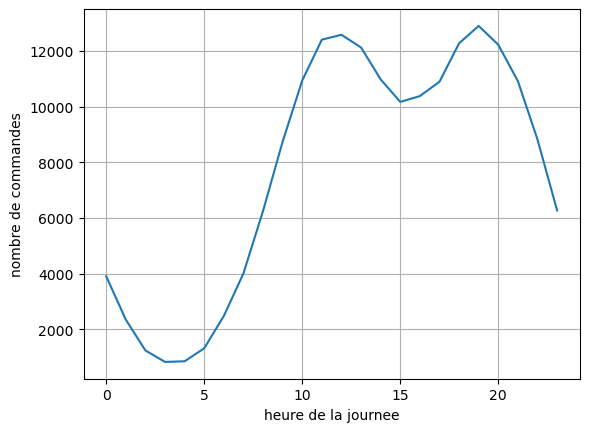

In [103]:
plt.grid()
plt.plot(keys , hours)
plt.xlabel('heure de la journee')
plt.ylabel('nombre de commandes')

4eme question : quel est le produit qui realise le plus de vente?

In [108]:
#on va identifier l'identifiant du produit et on va grouper par rapport au produit

all_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

<Axes: xlabel='Product'>

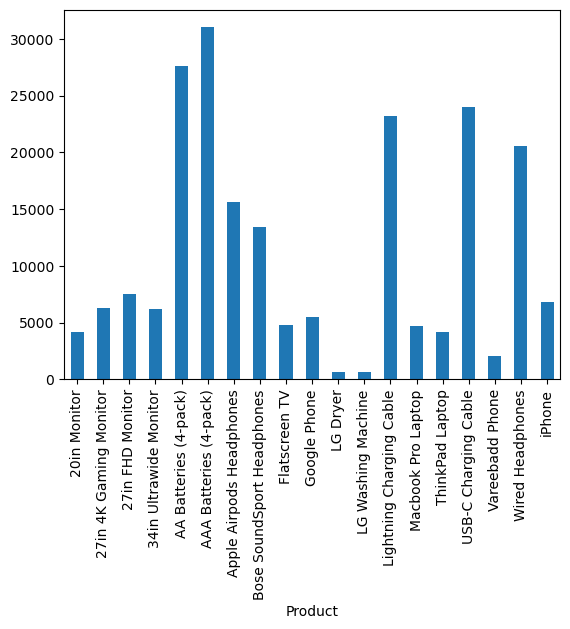

In [112]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')